# Regression

This project is focused on working with regression: consideration of several types of regression, behavior analysis.

Two sets of data are considered:

dataset_1 link: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

dataset_2 link: https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise 

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

## dataset_1

In [3]:
FullTable = pd.read_excel('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/combined-cycle-power-plant.xlsx')
FullTable

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
X = FullTable.drop(['PE'],axis=1)
y = FullTable['PE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Linear regression

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Coef: ", lr.coef_)
print("R2:", r2_score(y_test, y_pred))

Coef:  [-1.97021511 -0.2388262   0.06871465 -0.15787046]
R2: 0.9284427348740389


<b>Note:</b>


It can be seen that the signs "temperature", "atmospheric pressure" and "vacuum" on the exhaust have a negative impact on power generation. While the sign "humidity" has a positive effect.The most important feature is "temperature", the least important is "humidity".

The importance of temperature can be explained by the fact that a combined cycle power plant consists of gas turbines, steam turbines and waste heat steam generators. In CCGT, electricity is generated by gas and steam turbines, which are combined into one cycle and transferred from one turbine to another. While the Vacuum is formed and acts on the steam turbine. At every stage of power generation, temperature is extremely important, as a small deviation can lead to completely different results.

### Ridge regression

In [6]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Coef: ", ridge.coef_)
print("R2:", r2_score(y_test, y_pred))

Coef:  [-1.96753715 -0.23984359  0.06938638 -0.15742168]
R2: 0.9284367271482424


<b>Note:</b>

R2 and coefficients practically do not change in comparison with the linear model.

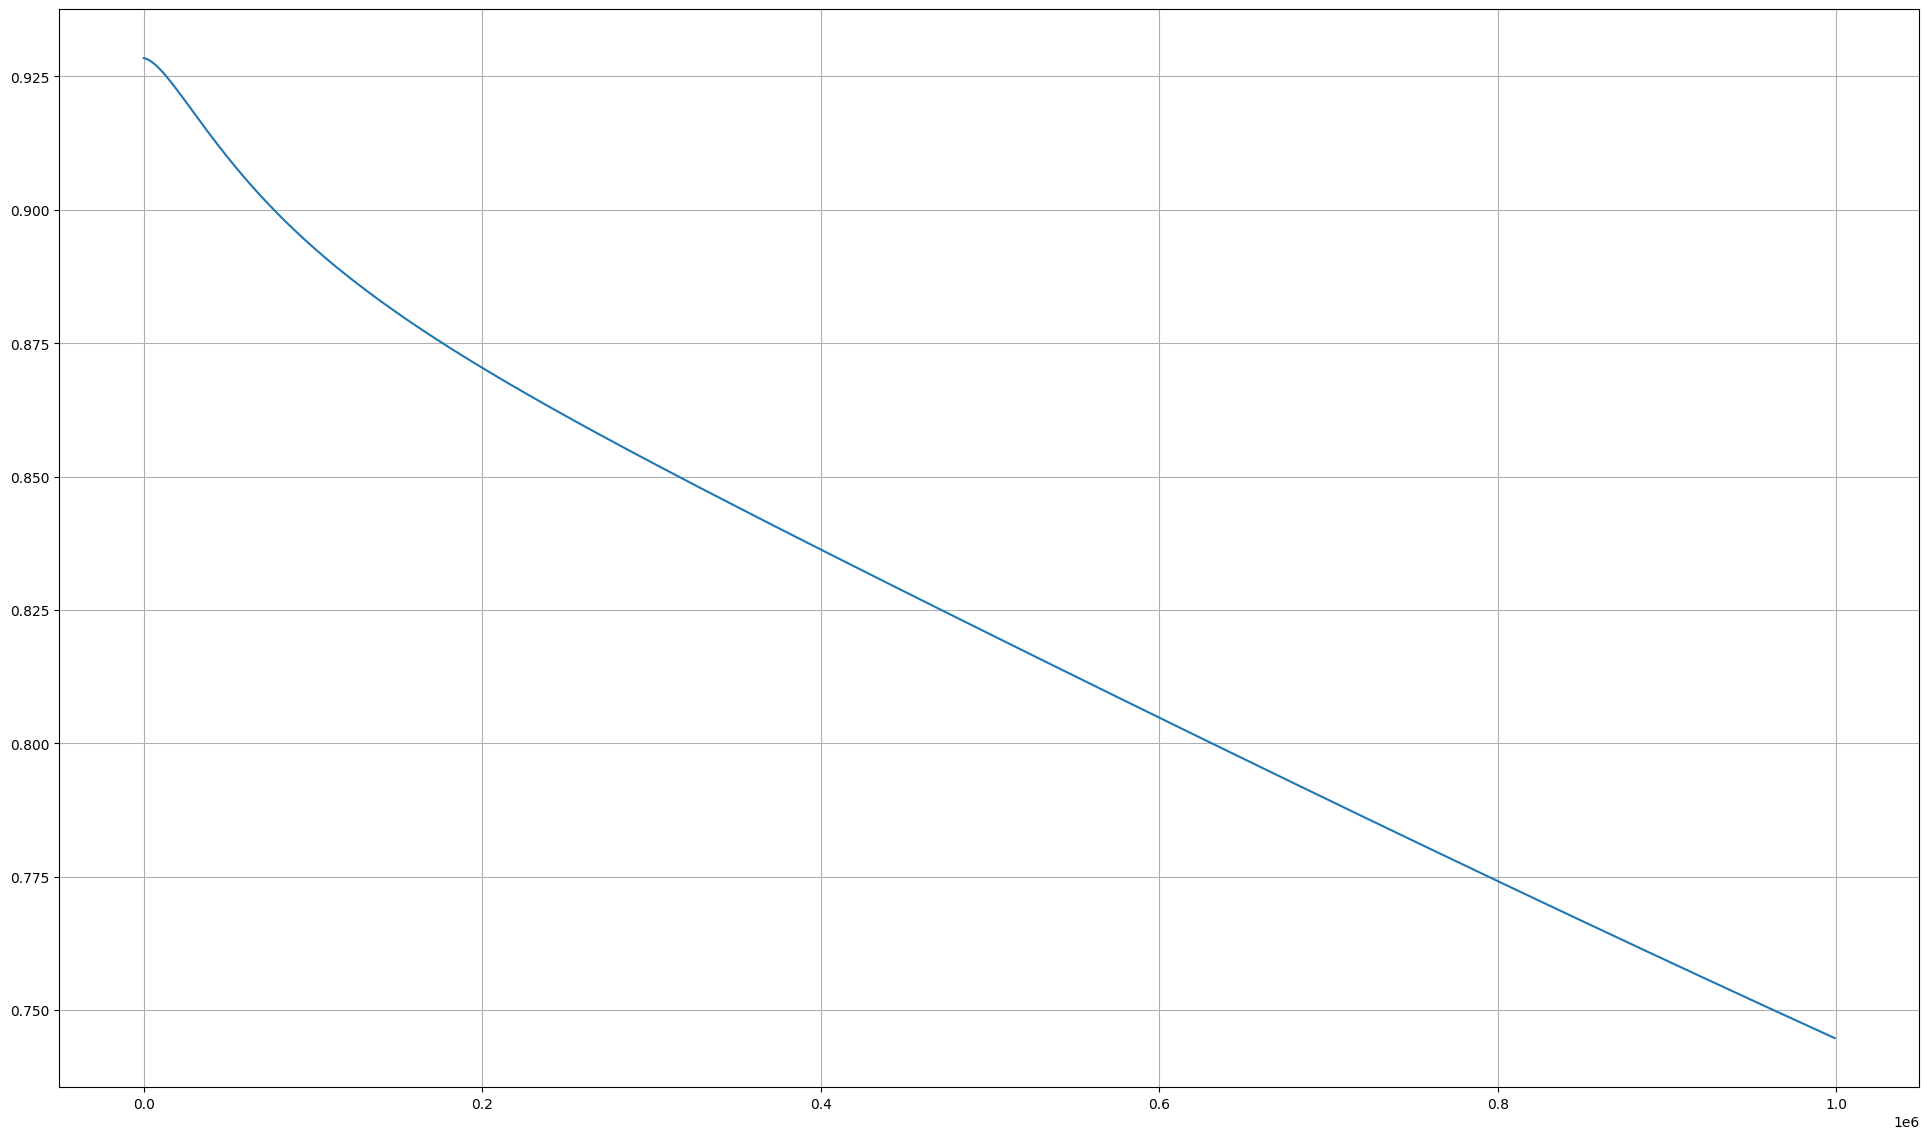

In [12]:
## Plotting the dependence of the value of the coefficients and R2 score on the change in the alpha parameter.

r2_scrores = []
coef_1 = []
coef_2 = []
coef_3 = []
coef_4 = []
for i in range(0, 1000000, 1000):
  ridge = Ridge(alpha=i)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)
  r2_scrores.append(r2_score(y_test, y_pred))
  coefs = ridge.coef_
  coef_1.append(coefs[0])
  coef_2.append(coefs[1])
  coef_3.append(coefs[2])
  coef_4.append(coefs[3])

x = []
for i in range(0, 1000000, 1000):
  x.append(i)
plt.figure(figsize=[24,14])
plt.grid()
plt.plot(x, r2_scrores)
plt.show()

<b>Note:</b>

As the hyperparameter alpha increases, the R2 score metric decreases, which indicates a deterioration in the quality of the regression.

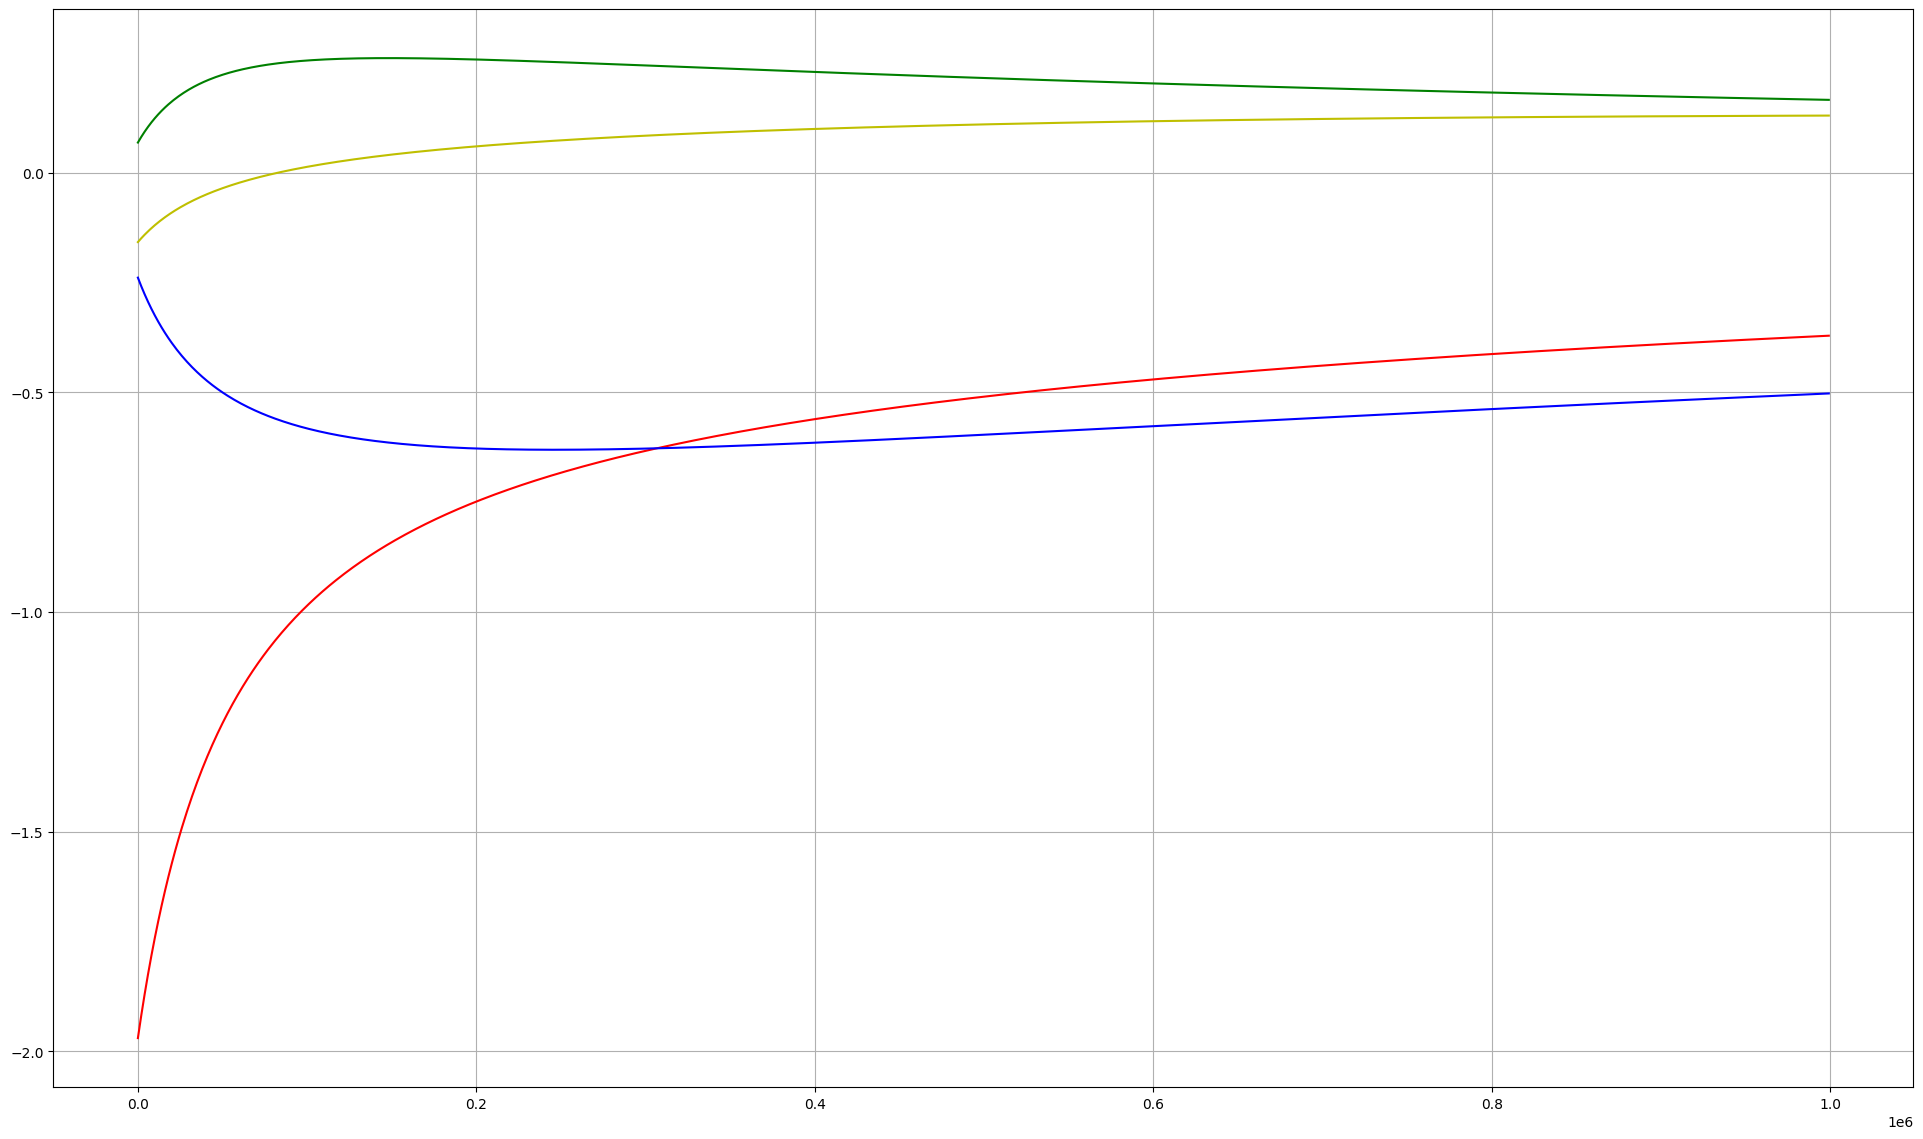

In [8]:
plt.figure(figsize=[24,14])
plt.grid()
plt.plot(x, coef_1, color='r')
plt.plot(x, coef_2, color='b')
plt.plot(x, coef_3, color='g')
plt.plot(x, coef_4, color='y')
plt.show()

<b>Note:</b>

With an increase in the hyperparameter alpha, the coefficients of the signs of temperature and the effect of vacuum increase, that is, they increase their significance. In addition, the coefficient in front of the sign "ambient pressure" first slightly decreases, and then increases again. However, these fluctuations are quite small. The "moisture" coefficient has the opposite trend: first there is an increase and then a decrease, but these changes are also quite insignificant.

### Lasso regression

In [9]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Coef: ", lasso.coef_)
print("R2:", r2_score(y_test, y_pred))

Coef:  [-1.37952531 -0.4259584   0.         -0.        ]
R2: 0.9079157332937575


<b>Note:</b>

Significant changes can be seen. First, there was a worsening of the regression compared to the previous calculations. Secondly, the coefficients have also changed. Lasso reduced the significance of the "temperature" feature by ~0.6, but increased the coefficient in front of the "ambient pressure" feature by ~0.2. In addition, Lasso determined the last two features to be insignificant and nullified their coefficients.

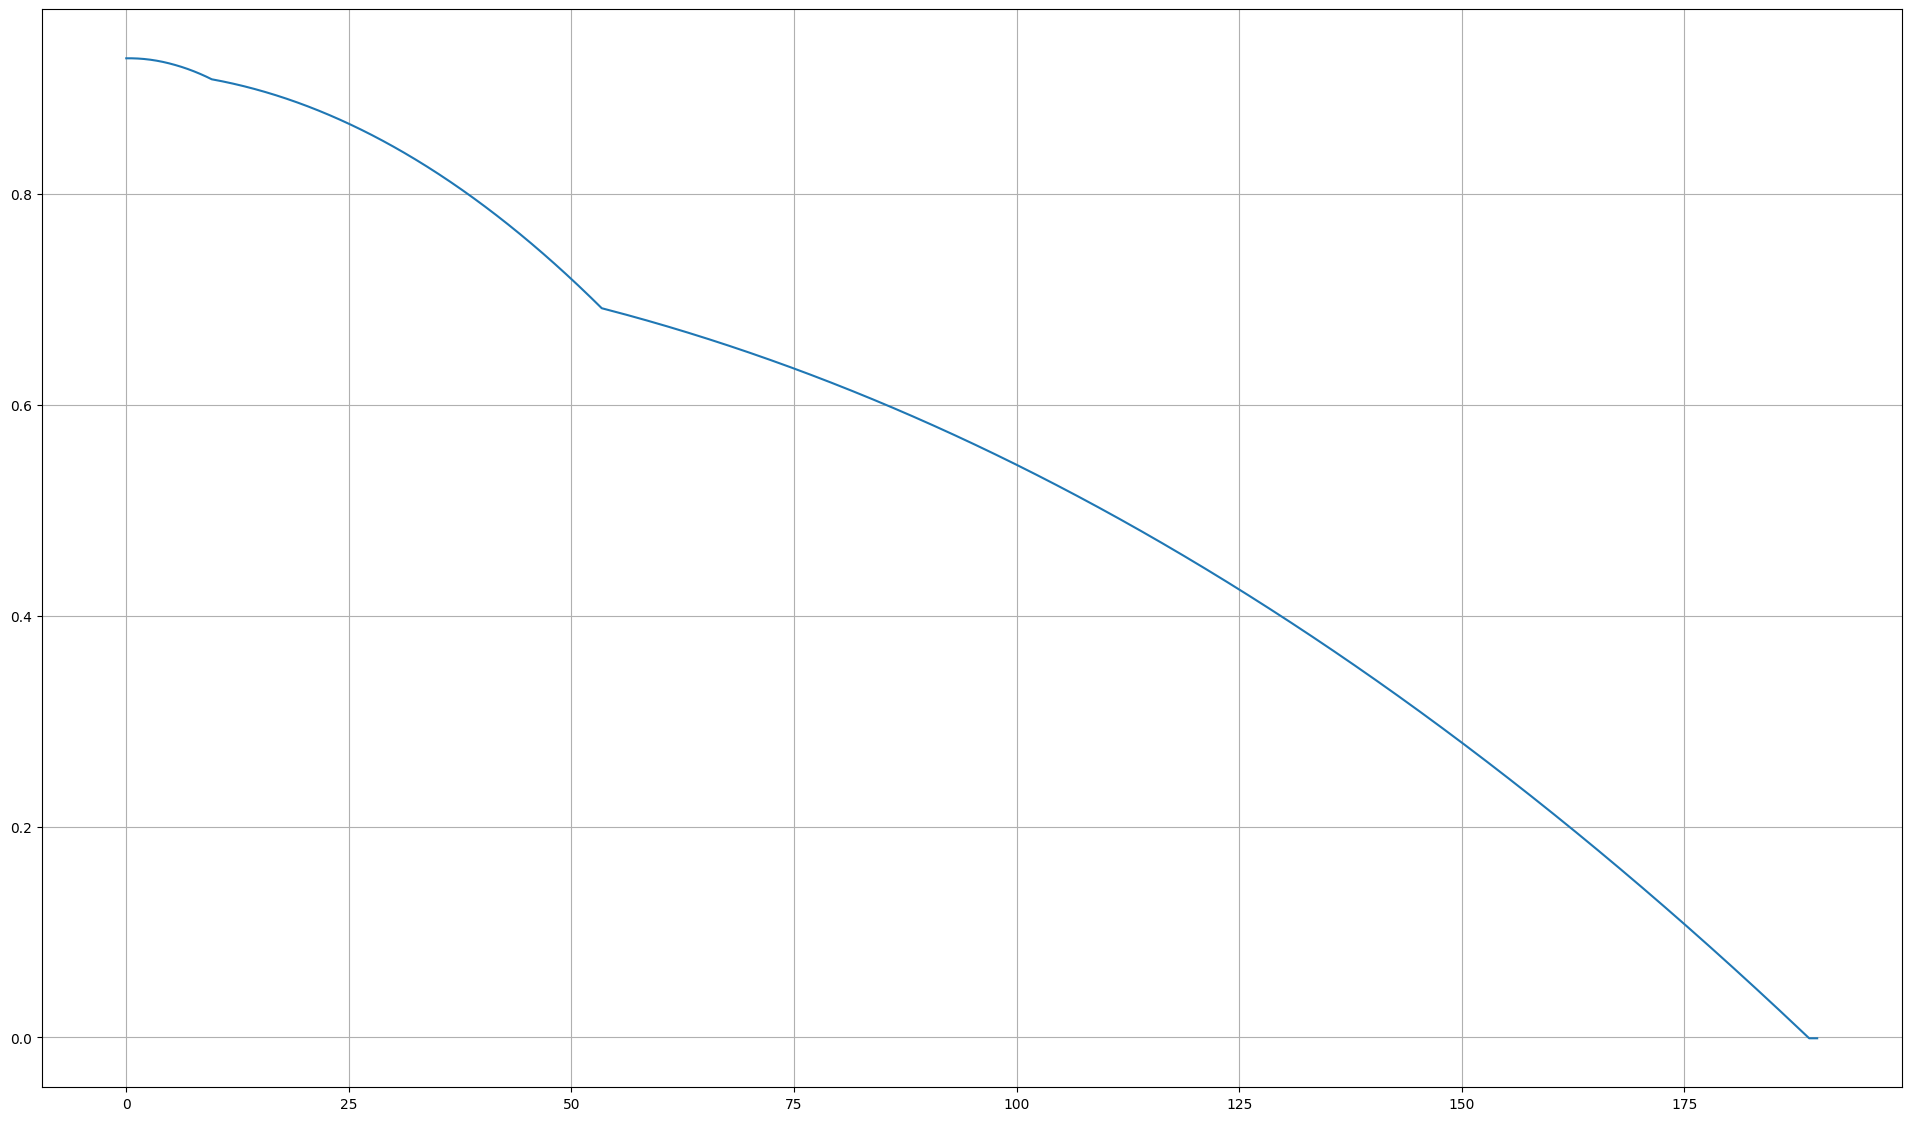

In [13]:
## Plotting the dependence of the value of the coefficients and R2 score on the change in the alpha parameter.
r2_scrores = []
coef_1 = []
coef_2 = []
coef_3 = []
coef_4 = []
for i in range(1, 190000, 100):
  lasso = Lasso(alpha=i/1000)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)
  r2_scrores.append(r2_score(y_test, y_pred))
  coefs = lasso.coef_
  coef_1.append(coefs[0])
  coef_2.append(coefs[1])
  coef_3.append(coefs[2])
  coef_4.append(coefs[3])

x = []
for i in range(1, 190000, 100):
  x.append(i/1000)
plt.figure(figsize=[24,14])
plt.grid()
plt.plot(x, r2_scrores)
plt.show()

<b>Note:</b>

It can be noted that the quality of the regression decreases with increasing alpha. This decline does not occur evenly, but periodically with a slight increase.

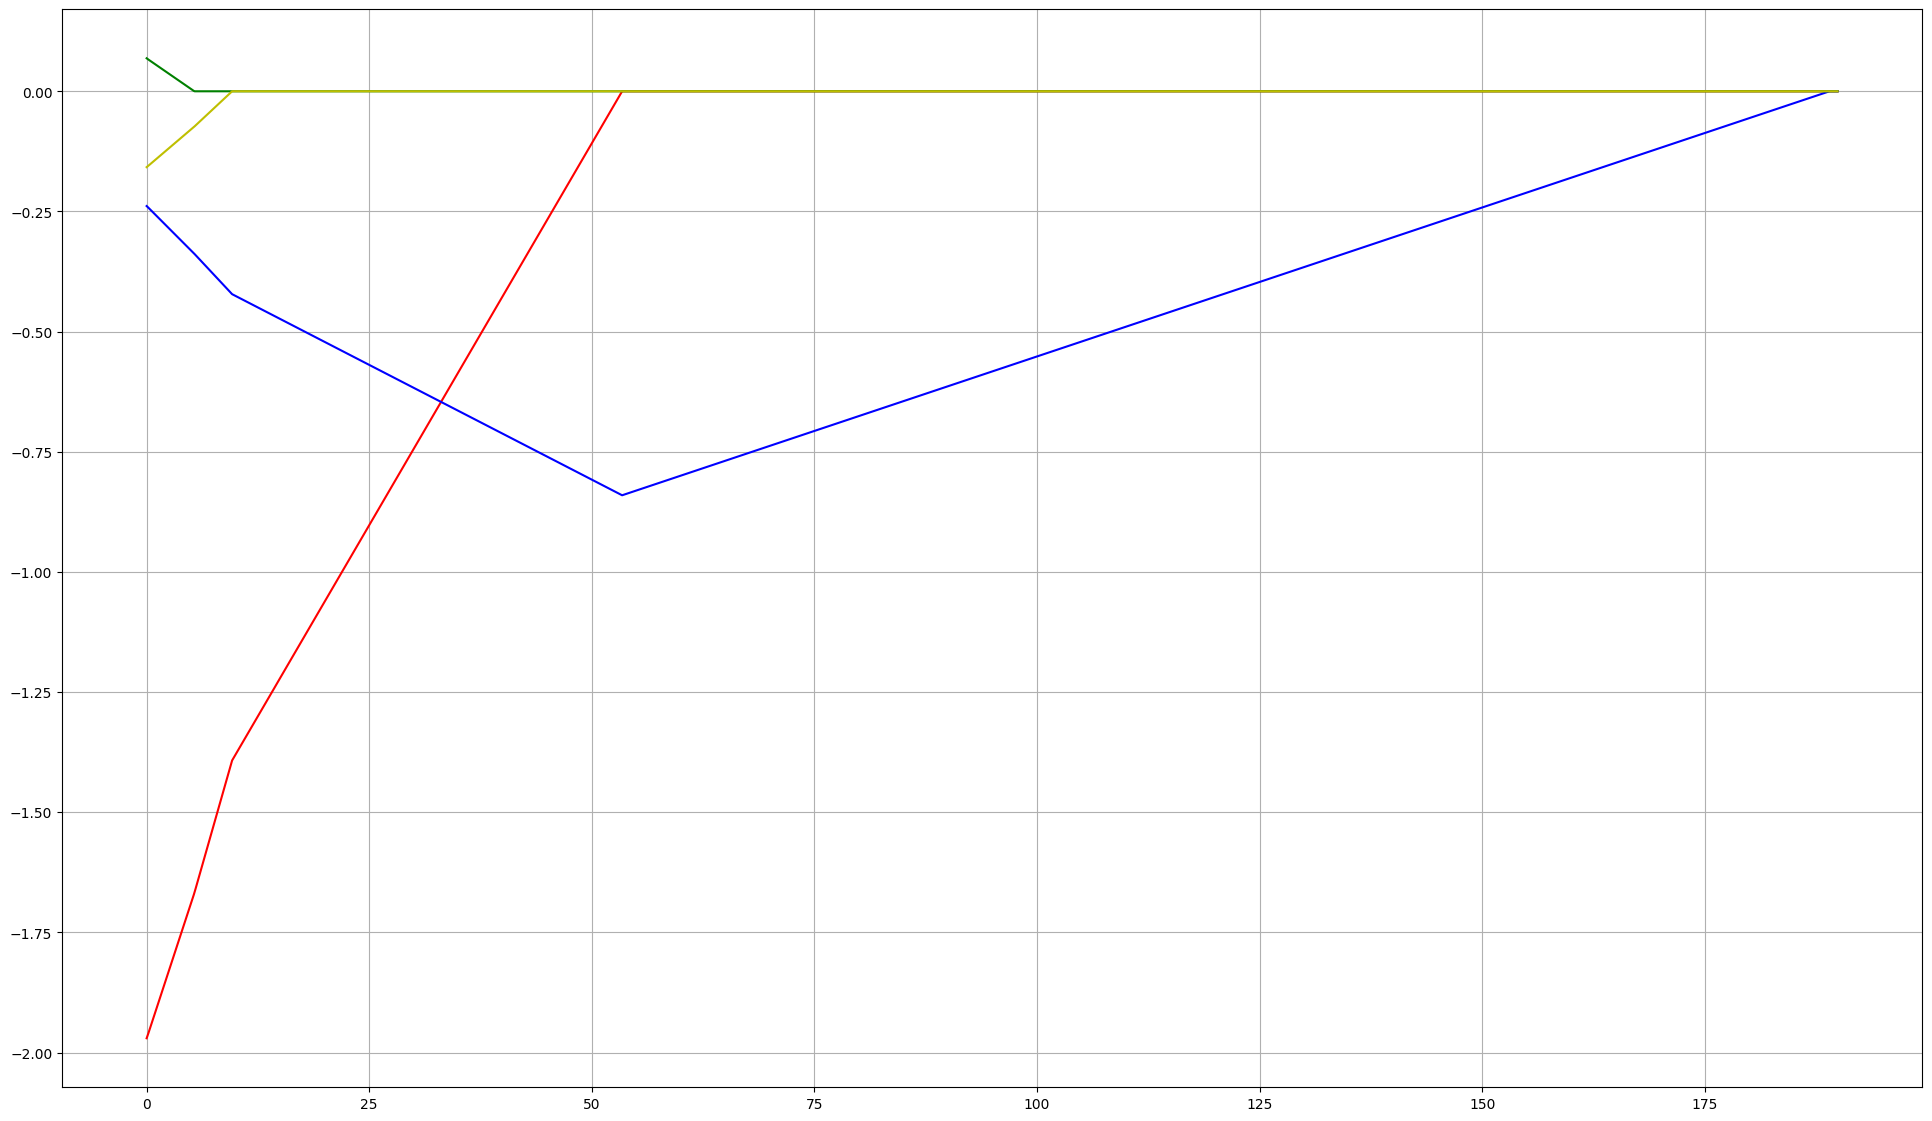

In [11]:
plt.figure(figsize=[24,14])
plt.grid()
plt.plot(x, coef_1, color='r')
plt.plot(x, coef_2, color='b')
plt.plot(x, coef_3, color='g')
plt.plot(x, coef_4, color='y')
plt.show()

<b>Note:</b>

The general trend is that increasing the alpha parameter results in a sparse model with fewer coefficients, since some coefficients may become zero and therefore be excluded from the model.

The first coefficient vanished at the sign "humidity", then the coefficient of the sign "vacuum". After that, the coefficient of the attribute "temperature" was reset to zero, and the most recent coefficient of the attribute "atmospheric pressure".

## dataset_2

In [14]:
data = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
data

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [15]:
## Data preprocessing

data.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])
data= pd.concat([new_row, data]).reset_index(drop = True)

data

,FR,AA,CL,FS,SS,L
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [16]:
X = data.drop(['L'],axis=1)
y = data['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [17]:
X_test

,FR,AA,CL,FS,SS
1250,6300,0.0,0.1016,71.3,0.001211
809,630,8.4,0.0508,55.5,0.005449
24,5000,0.0,0.3048,55.5,0.002831
1053,4000,4.8,0.0254,31.7,0.000931
1062,2000,9.5,0.0254,71.3,0.004207
...,...,...,...,...,...
630,250,9.9,0.1524,71.3,0.019300
1414,630,12.3,0.1016,71.3,0.033779
490,2000,0.0,0.1524,39.6,0.001933
684,1000,9.9,0.1524,31.7,0.025278



Comparison of both regression models that support CV.

In [19]:
best_alphas=[]
r2=[]
r2_max = 0.0

In [22]:
alphas = np.arange(0.0001, 20, 0.005)
print("\nRidge")
for cvn in [3,5,10]:
  data = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
  data.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
  new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])  
  data = pd.concat([new_row, data]).reset_index(drop = True)
  X = data.drop(['L'],axis=1)
  y = data['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
  ridge_ = RidgeCV(alphas = alphas,  scoring = 'r2', cv=cvn)
  ridge_.fit(X_train, y_train)
  y_pred = ridge_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2: ", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3,4]:
    ridge_.coef_[i]=round(ridge_.coef_[i], 5)
  print("Coef: ", ridge_.coef_)
  best_alphas.append({ridge_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nLasso")
for cvn in [3,5,10]:
  data = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
  data.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
  new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])  
  data = pd.concat([new_row, data]).reset_index(drop = True)
  X = data.drop(['L'],axis=1)
  y = data['L']
  lasso_ = LassoCV(alphas = alphas, cv=cvn)
  lasso_.fit(X_train, y_train)
  y_pred = lasso_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3,4]:
    lasso_.coef_[i]=round(lasso_.coef_[i], 5)
  print("Coef: ", lasso_.coef_)
  best_alphas.append({lasso_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nMax r2_score = ", r2_max)


Ridge
CV:  3
R2:  0.566764624250054
Coef:  [-1.2700000e-03 -4.3514000e-01 -3.5773560e+01  1.0106000e-01
 -1.4079334e+02]


CV:  5
R2:  0.549841052011299
Coef:  [-1.2700000e-03 -4.0635000e-01 -3.5152320e+01  1.0045000e-01
 -1.5394202e+02]


CV:  10
R2:  0.5879912372951988
Coef:  [-1.2600000e-03 -4.3233000e-01 -3.5517660e+01  9.9420000e-02
 -1.3956157e+02]



Lasso
CV:  3
R2: 0.5880629786963707
Coef:  [-1.2500000e-03 -4.2011000e-01 -3.5324450e+01  9.9090000e-02
 -1.4595155e+02]


CV:  5
R2: 0.5880629786963707
Coef:  [-1.2500000e-03 -4.2011000e-01 -3.5324450e+01  9.9090000e-02
 -1.4595155e+02]


CV:  10
R2: 0.5880629786963707
Coef:  [-1.2500000e-03 -4.2011000e-01 -3.5324450e+01  9.9090000e-02
 -1.4595155e+02]



Max r2_score =  0.5880629786963707


<b>Note:</b>

Different CV values ​​give different results for Ridge, but for Lasso there is no effect and the values ​​are the same.

In [24]:
## removing data that least correlates with the predicted value.

print(data.corr())

print("\nRidge")
for cvn in [3,5,10]:
  data = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
  data.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
  new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])  
  data = pd.concat([new_row, data]).reset_index(drop = True)
  X = data.drop(['SS', 'L'],axis=1)
  y = data['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
  ridge_ = RidgeCV(alphas = alphas,  scoring = 'r2', cv=cvn)
  ridge_.fit(X_train, y_train)
  y_pred = ridge_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2: ", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3]:
    ridge_.coef_[i]=round(ridge_.coef_[i], 5)
  print("Coef: ", ridge_.coef_)
  best_alphas.append({ridge_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nLasso")
for cvn in [3,5,10]:
  data = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
  data.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
  new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])  
  data = pd.concat([new_row, data]).reset_index(drop = True)
  X = data.drop(['SS','L'],axis=1)
  y = data['L']
  lasso_ = LassoCV(alphas = alphas, cv=cvn)
  lasso_.fit(X_train, y_train)
  y_pred = lasso_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3]:
    lasso_.coef_[i]=round(lasso_.coef_[i], 5)
  print("Coef: ", lasso_.coef_)
  best_alphas.append({lasso_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nMax r2_score = ", r2_max)

          FR        AA        CL        FS        SS         L
FR  1.000000 -0.272765 -0.003661  0.133664 -0.230107 -0.390711
AA -0.272765  1.000000 -0.504868  0.058760  0.753394 -0.156108
CL -0.003661 -0.504868  1.000000  0.003787 -0.220842 -0.236162
FS  0.133664  0.058760  0.003787  1.000000 -0.003974  0.125103
SS -0.230107  0.753394 -0.220842 -0.003974  1.000000 -0.312670
L  -0.390711 -0.156108 -0.236162  0.125103 -0.312670  1.000000

Ridge
CV:  3
R2:  0.5129395919965403
Coef:  [-1.280000e-03 -7.153400e-01 -4.094985e+01  1.110600e-01]


CV:  5
R2:  0.5468975903505557
Coef:  [-1.290000e-03 -7.049900e-01 -3.977843e+01  1.040700e-01]


CV:  10
R2:  0.46992956320338053
Coef:  [-1.300000e-03 -7.034900e-01 -3.963818e+01  1.115900e-01]



Lasso
CV:  3
R2: 0.47017632664949327
Coef:  [-1.300000e-03 -7.056900e-01 -3.988097e+01  1.116600e-01]


CV:  5
R2: 0.47017632664949327
Coef:  [-1.300000e-03 -7.056900e-01 -3.988097e+01  1.116600e-01]


CV:  10
R2: 0.47017632664949327
Coef:  [-1.300000e-03

<b>Note:</b>


Thus, removing any (checked all) from the columns does not give an increase in R2_score for models

In [25]:
## removing outliers to keep the data cleaner
CleanData = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
CleanData.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])
CleanData= pd.concat([new_row, CleanData]).reset_index(drop = True)
DataColumns = ["FR", "AA", 'CL', "FS", "SS", "L"]

for x in DataColumns:
  q95 = CleanData[x].quantile(q=0.90)
  q05 = CleanData[x].quantile(q=0.10)

  intr_qr = q95-q05

  max = q95+(intr_qr)
  min = q05-(intr_qr)

  CleanData.loc[CleanData[x] < min,x] = np.nan
  CleanData.loc[CleanData[x] > max,x] = np.nan

CleanData = CleanData.dropna(axis=0)
CleanData


,FR,AA,CL,FS,SS,L
0,800.0,0.0,0.3048,71.3,0.002663,126.201
1,1000.0,0.0,0.3048,71.3,0.002663,125.201
2,1250.0,0.0,0.3048,71.3,0.002663,125.951
3,1600.0,0.0,0.3048,71.3,0.002663,127.591
4,2000.0,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500.0,15.6,0.1016,39.6,0.052849,110.264
1499,3150.0,15.6,0.1016,39.6,0.052849,109.254
1500,4000.0,15.6,0.1016,39.6,0.052849,106.604
1501,5000.0,15.6,0.1016,39.6,0.052849,106.224


In [26]:
X = CleanData.drop(['L'],axis=1)
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
print("\nRidge")
for cvn in [3,5,10]:
  X = CleanData.drop(['L'],axis=1)
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  ridge_ = RidgeCV(alphas = alphas,  scoring = 'r2', cv=cvn)
  ridge_.fit(X_train, y_train)
  y_pred = ridge_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2: ", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3,4]:
    ridge_.coef_[i]=round(ridge_.coef_[i], 5)
  print("Coef: ", ridge_.coef_)
  best_alphas.append({ridge_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nLasso")
for cvn in [3,5,10]:
  X = CleanData.drop(['L'],axis=1)
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  lasso_ = LassoCV(alphas = alphas, cv=cvn)
  lasso_.fit(X_train, y_train)
  y_pred = lasso_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2,3,4]:
    lasso_.coef_[i]=round(lasso_.coef_[i], 5)
  print("Coef: ", lasso_.coef_)
  best_alphas.append({lasso_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nMax r2_score = ", r2_max)


Ridge
CV:  3
R2:  0.5916594934443749
Coef:  [-1.5400000e-03 -4.2786000e-01 -3.4287620e+01  1.0363000e-01
 -1.4293213e+02]


CV:  5
R2:  0.5959047026287578
Coef:  [-1.5500000e-03 -4.0374000e-01 -3.3193230e+01  1.0066000e-01
 -1.4750414e+02]


CV:  10
R2:  0.46245155874640687
Coef:  [-1.5500000e-03 -4.1747000e-01 -3.4738260e+01  1.0224000e-01
 -1.4792628e+02]



Lasso
CV:  3
R2: 0.4555595962770793
Coef:  [-1.5300000e-03 -4.1728000e-01 -3.4511930e+01  9.6090000e-02
 -1.4768404e+02]


CV:  5
R2: 0.39083284628070625
Coef:  [-1.5800000e-03 -4.0074000e-01 -3.3800610e+01  9.6940000e-02
 -1.6116731e+02]


CV:  10
R2: 0.49914222285832066
Coef:  [-1.570000e-03 -4.074400e-01 -3.364612e+01  9.810000e-02 -1.523406e+02]



Max r2_score =  0.5959047026287578


<b>Note:</b>

Clearing data from outliers - increased R2_score for the test sample to (0.62 with Ridge and CV=3), after restarting the value was lost and the value for Lasso = 0.57 for the test sample became the maximum. It is worth noting that now different values ​​of CV began to give different coefficients and different R2.

In [27]:
X = CleanData.drop(['L'],axis=1)
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
ridgeN_ = Ridge(0.00001)
ridgeN_.fit(X_train, y_train)
y_pred = ridgeN_.predict(X)
r2s = r2_score(y, y_pred)
print(r2s)

0.5212355446257863


In [28]:
X = CleanData.drop(['L'],axis=1)
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
LassoN_ = Lasso(0.00001)
LassoN_.fit(X_train, y_train)
y_pred = LassoN_.predict(X)
r2s = r2_score(y, y_pred)
print(r2s)

0.5212246338816242


In [31]:
X = CleanData.drop(['L'],axis=1)
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
LN_ = LinearRegression()
LN_.fit(X_train, y_train)
y_pred = LN_.predict(X)
r2s = r2_score(y, y_pred)
print(r2s)

0.5213284052740874


<b>Note:</b>


All three models (LineralRegression, Ridge, Lasso) give a maximum of ~0.52 at alpha -> 0, while there are no prerequisites for an increase in the value.

[36.13 34.02 16.64 10.67  2.54]


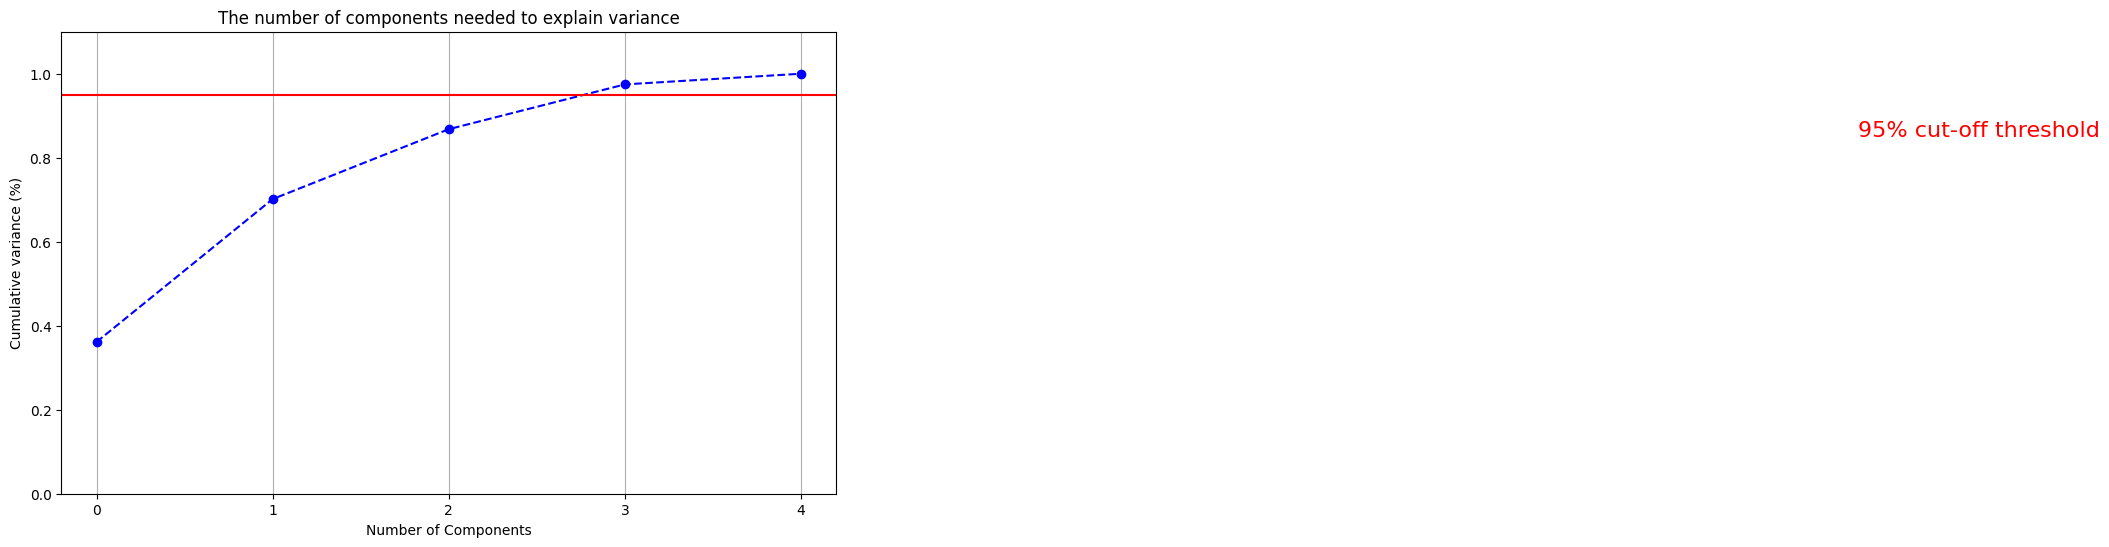

In [33]:
## dimensionality reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
CleanData_rescaled = scaler.fit_transform(CleanData.drop(['L'],axis=1))
pca = PCA().fit(CleanData_rescaled)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots()
xi = np.arange(0, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print(np.round(pca.explained_variance_ratio_*100, 2))

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(10.0, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

<b>Note:</b>

Based on the graph, 2-3 components are suitable for us, we will remove one component and check how our indicators change.

In [35]:
from sklearn.preprocessing import scale
CleanData_scaled = scale(CleanData.drop(['L'],axis=1))
pca = PCA(n_components=3)
U = pca.fit_transform(CleanData_scaled)
CleanData_U = U
print("Dimension " + str(U.shape))
print("Variance \n" + str(pca.explained_variance_ratio_.round(2)))
print("Components \n" + str(pca.components_.round(3)))


Dimension (1459, 3)
Variance 
[0.42 0.22 0.19]
Components 
[[-0.243  0.649 -0.431  0.032  0.576]
 [ 0.632  0.073 -0.266  0.722 -0.054]
 [ 0.532  0.004 -0.511 -0.664 -0.125]]


In [36]:
X = CleanData_U
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

print("\nRidge")
for cvn in [3,5,10]:
  X = CleanData_U
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  ridge_ = RidgeCV(alphas = alphas,  scoring = 'r2', cv=cvn)
  ridge_.fit(X_train, y_train)
  y_pred = ridge_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2: ", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2]:
    ridge_.coef_[i]=round(ridge_.coef_[i], 5)
  print("Coef: ", ridge_.coef_)
  best_alphas.append({ridge_.alpha_, cvn})
  r2.append(r2s)
  print("\n")

print("\nLasso")
for cvn in [3,5,10]:
  X = CleanData_U
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  lasso_ = LassoCV(alphas = alphas, cv=cvn)
  lasso_.fit(X_train, y_train)
  y_pred = lasso_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_max:
    r2_max = r2s
  for i in [0,1,2]:
    lasso_.coef_[i]=round(lasso_.coef_[i], 5)
  print("Coef: ", lasso_.coef_)
  best_alphas.append({lasso_.alpha_, cvn})
  r2.append(r2s)
  print("\n")


print("\nMax r2_score = ", r2_max)


Ridge
CV:  3
R2:  0.04486786321735692
Coef:  [-0.35281 -0.51871 -1.11944]


CV:  5
R2:  0.07285961253735962
Coef:  [-0.30699 -0.41201 -1.10953]


CV:  10
R2:  0.03584386000589257
Coef:  [-0.36954 -0.48028 -1.13376]



Lasso
CV:  3
R2: -0.04611495251223641
Coef:  [-0.35002 -0.4921  -1.34803]


CV:  5
R2: 0.01934113431653195
Coef:  [-0.41669 -0.47234 -1.18676]


CV:  10
R2: -0.01978679753245438
Coef:  [-0.42039 -0.47792 -1.25537]



Max r2_score =  0.5959047026287578


<b>Note:</b>

The decrease in dimension led to a catastrophic drop in the value of R2. Thus, models without an additional parameter fail to predict the correct value.

As a result, the maximum R2 for the test sample = 0.62 on the previously studied models. Ridge at CV=3 and alpha ~0.01, however, it was not possible to obtain such high values ​​further. The overall indicator for the entire sample is ~0.52, which is unacceptable. This situation is most likely due to the fact that our parameters have little effect on the predicted value. So the maximum correlation between the column that we predict and the column on the basis of which we predict is only -0.39, for other values ​​it is several times less, which means that it is difficult for the model to build relationships between the indicator and what should be the result.
To solve this problem, we will try to use other models.

### other models

In [37]:
from sklearn.ensemble import RandomForestRegressor
r2_for_max = 0.0
r2s_m = 0.0
for n in range (10,101):
  X = CleanData.drop(['L'], axis=1)
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

  RandomForestRegressor_ = RandomForestRegressor(n_estimators=n)
  RandomForestRegressor_.fit(X_train, y_train)
  y_pred = RandomForestRegressor_.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  if r2s > r2_for_max:
    r2_for_max = r2s
    y_pred = RandomForestRegressor_.predict(X)
    r2s_m = r2_score(y, y_pred)

print("R2 for test max = ", r2_for_max)
print("R2 for full max = ", r2s_m)

R2 for test max =  0.9634773686433429
R2 for full max =  0.9885252218964045


In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

CleanData = pd.read_csv('/Users/olgafrolova/Documents/Data-science(introduction)/datasets/airfoil_self_noise.dat',sep='\t')
CleanData.rename(columns={'800': 'FR', '0': 'AA', '0.3048': 'CL', '71.3': 'FS', '0.00266337': 'SS', '126.201': 'L'}, inplace=True)
new_row = pd.DataFrame({'FR':800, 'AA':0, 'CL':0.3048,'FS':71.3, 'SS':0.00266337, 'L':126.201},index =[0])
CleanData= pd.concat([new_row, CleanData]).reset_index(drop = True)
DataColumns = ["FR", "AA", 'CL', "FS", "SS", "L"]

for x in DataColumns:
  q90 = CleanData[x].quantile(q=0.90)
  q10 = CleanData[x].quantile(q=0.10)

  intr_qr = q90-q10

  max = q90+(intr_qr)
  min = q10-(intr_qr)

  CleanData.loc[CleanData[x] < min,x] = np.nan
  CleanData.loc[CleanData[x] > max,x] = np.nan

CleanData = CleanData.dropna(axis=0)
X = CleanData.drop(['L'],axis=1)
y = CleanData['L']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)


ada_reg = AdaBoostRegressor(estimator=None, learning_rate=4.5, loss='exponential',
         n_estimators=175, random_state=53) 
ada_reg.fit(X_train, y_train)
scores = cross_val_score(ada_reg, X_train,y_train,cv=10,scoring ="r2")
print(scores)
y_pred = ada_reg.predict(X_test)
R_2 = r2_score(y_test,y_pred)
print("R2:", R_2)

[0.63927416 0.73032963 0.70583699 0.78286001 0.70757361 0.76592962
 0.67687426 0.74332791 0.74992056 0.73168064]
R2: 0.700581509067874


In [41]:
y_pred_full = ada_reg.predict(X)
print("R2:", r2_score(y, y_pred_full))

R2: 0.7501760336930403


In [43]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.linear_model import LassoLarsCV
print("\nOrthogonalMatchingPursuitCV")
r2_omp_max = 0.0
for cvn in [3,5,10]:
  X = CleanData.drop(['L'],axis=1)
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  O_M= OrthogonalMatchingPursuitCV(cv=cvn)
  O_M.fit(X_train, y_train)
  y_pred = O_M.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_omp_max:
    r2_omp_max = r2s
  for i in [0,1,2]:
    O_M.coef_[i]=round(O_M.coef_[i], 5)
  print("Coef: ", O_M.coef_)
  r2.append(r2s)
  print("\n")

print("\nLassoLarsCV")
for cvn in [3,5,10]:
  X = CleanData.drop(['L'],axis=1)
  y = CleanData['L']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
  LL= LassoLarsCV(cv=cvn)
  LL.fit(X_train, y_train)
  y_pred = LL.predict(X_test)
  r2s = r2_score(y_test, y_pred)
  print("CV: ", cvn)
  print("R2:", r2s)
  if r2s > r2_omp_max:
    r2_omp_max = r2s
  for i in [0,1,2]:
    LL.coef_[i]=round(LL.coef_[i], 5)
  print("Coef: ", LL.coef_)
  r2.append(r2s)
  print("\n")
  
print(r2_omp_max)


OrthogonalMatchingPursuitCV
CV:  3
R2: 0.6212854175208662
Coef:  [-1.55000000e-03 -4.09520000e-01 -3.43182500e+01  9.85375159e-02
 -1.48917687e+02]


CV:  5
R2: 0.37330554325981136
Coef:  [-1.59000000e-03 -3.50140000e-01 -3.23715800e+01  9.94324590e-02
 -1.68488299e+02]


CV:  10
R2: 0.47050708055908264
Coef:  [-1.53000000e-03 -3.81820000e-01 -3.41263100e+01  9.41547214e-02
 -1.59068304e+02]



LassoLarsCV
CV:  3
R2: 0.513322367013155
Coef:  [-1.53000000e-03 -4.25250000e-01 -3.34703500e+01  9.95135871e-02
 -1.45454927e+02]


CV:  5
R2: 0.5283161266872042
Coef:  [-1.55000000e-03 -3.85060000e-01 -3.34882600e+01  9.75449427e-02
 -1.55981106e+02]


CV:  10
R2: 0.5122422089583434
Coef:  [-1.56000000e-03 -4.40340000e-01 -3.49710700e+01  1.02061329e-01
 -1.39568438e+02]


0.6212854175208662


In [45]:
reg = OrthogonalMatchingPursuitCV(cv=5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X)
R_2 = r2_score(y,y_pred)
print("R2:", R_2)

R2: 0.5209310264028899


In [46]:
reg = LassoLarsCV(cv=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X)
R_2 = r2_score(y,y_pred)
print("R2:", R_2)

R2: 0.5209310264028899
